<a href="https://colab.research.google.com/github/everestso/Summer22/blob/main/s24LinearModelNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

In [10]:
### Includes
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
####%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import math

In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


[-14.25, 1.51, 5.32, 7.99, 11.56]


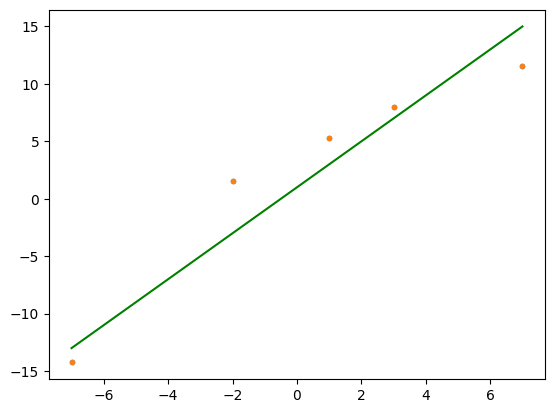

In [11]:
eps = 10.0
coef = (1, 2)
w = (0, 0)
Noise = lambda eps: np.random.random()*eps - (eps/2)


F = lambda w, x: w[0] + w[1]*x
X = [-7, -2, 1, 3, 7]
Y = [round(F(coef, x) + Noise(eps),2) for x in X]
print (Y)

plt.plot(X,Y,'.')
Hxs = [F(coef, x) for x in X]

plt.plot(X, Y, '.')
plt.plot(X, Hxs, '-', color="green")
plt.show()

In [12]:
# Print Examples:
X = [-7, -2, 1, 3, 7]
Y = [-14.25, 1.51, 5.32, 7.99, 11.56]
Examples = list(zip(X,Y))

for p in Examples:
  print (p)

(-7, -14.25)
(-2, 1.51)
(1, 5.32)
(3, 7.99)
(7, 11.56)


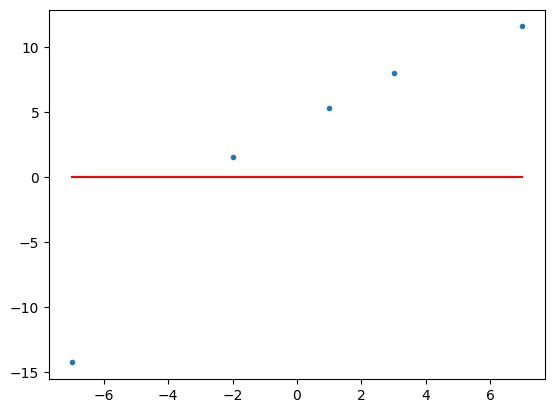

In [13]:
# Plot Model
def PlotModel(X, Y, model):
  Hxs = [F(model, x) for x in X]

  plt.plot(X, Y, '.')
  plt.plot(X, Hxs, '-', color="red")
  plt.show()

PlotModel( X, Y , (0,0))

In [14]:
SquaredError = lambda X, Y, w : sum([(y-F(w, x))**2 for x,y in zip(X,Y)])
SquaredErrorLogistic = lambda X, Y, w : sum([(y-G(F(w, x)))**2 for x,y in zip(X,Y)])


In [15]:
print ("X=", X)
print ("Y=", Y)
w= (0,0)
w=(0,1)
w=(0,0)
Predicts = [F(w, x) for x in X]
Errors = [x*(y-F(w, x)) for x, y in zip(X,Y)]
print ("Predicts = ", Predicts)
print ("Errors=", Errors, sum(Errors), sum(Errors)/len(X))


X= [-7, -2, 1, 3, 7]
Y= [-14.25, 1.51, 5.32, 7.99, 11.56]
Predicts =  [0, 0, 0, 0, 0]
Errors= [99.75, -3.02, 5.32, 23.97, 80.92] 206.94 41.388


In [22]:
ws= [(0,0), (0,1), (1,0), (1,1), (1,2)]
for model in ws:
  print (f"{model=}, {SquaredError(X, Y, model)=}")

model=(0, 0), SquaredError(X, Y, model)=431.1187
model=(0, 1), SquaredError(X, Y, model)=129.2387
model=(1, 0), SquaredError(X, Y, model)=411.8587
model=(1, 1), SquaredError(X, Y, model)=113.97870000000002
model=(1, 2), SquaredError(X, Y, model)=40.098699999999994


In [48]:
## Average Gradients
w = [0,0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Gradients = np.array([ ( (y-F(w,x[1]))*x[0], (y-F(w,x[1]))*x[1] ) for (x, y) in data ])
print(Gradients)

[[-14.25  99.75]
 [  1.51  -3.02]
 [  5.32   5.32]
 [  7.99  23.97]
 [ 11.56  80.92]]


In [49]:
GradientBatch = np.array([0.0, 0.0])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
for g in GradientBatch:
  print (f"{g=}")

[ 2.426 41.388]
g=2.426
g=41.388


In [50]:
## Try Different Learning Rates
print (f"{w=}, {SquaredError(X, Y, w)=}")
for learningRate, model in [(learningRate, np.add(w, GradientBatch*learningRate)) for learningRate in (0.01, 0.1, 1.0)]:
  print (f"{model=}, {learningRate=}, {SquaredError(X, Y, model)=}")

w=[0, 0], SquaredError(X, Y, w)=431.1187
model=array([0.02426, 0.41388]), learningRate=0.01, SquaredError(X, Y, model)=278.461828946
model=array([0.2426, 4.1388]), learningRate=0.1, SquaredError(X, Y, model)=635.0997745999998
model=array([ 2.426, 41.388]), learningRate=1.0, SquaredError(X, Y, model)=175525.90795999998


In [ ]:
print (SquaredError(X, Y, (0.018, 0.452)))
print (SquaredError(X, Y, (0.18, 4.52)))


279.28821199999993
706.3411999999998


In [83]:
# Algorithm Test
learningRate = 0.01
w = [0,0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Iterations = 0
print (f"{Iterations=}, {w=}  {SquaredError(X, Y, w)=}")

Iterations=0, w=[0, 0]  SquaredError(X, Y, w)=431.1187


In [85]:
Iterations = Iterations + 1
GradientBatch = np.array([0.0, 0.0])
Gradients = np.array([ ( (y-F(w,x[1]))*x[0], (y-F(w,x[1]))*x[1] ) for (x, y) in data ])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
w = np.add(w, GradientBatch*learningRate)
print (f"{Iterations=}, {w=}  {SquaredError(X, Y, w)=}")
#print ( {SquaredError(X, Y, w)=})

[ 2.426 41.388]
Iterations=1, w=array([0.02426, 0.41388])  SquaredError(X, Y, w)=278.461828946


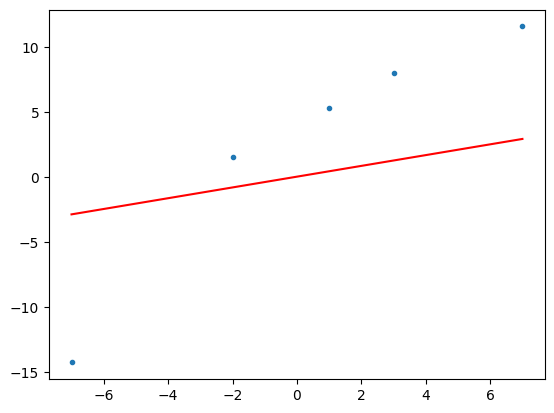

In [86]:
PlotModel(X, Y, w)

# Logistic Regression

In [ ]:
G = lambda xIn: 1/(1+np.e**(-xIn))

In [ ]:
Predict = lambda x: 1.0 if x > 0.5 else 0.0
w = (0,0)
Y = [Predict(G(F(coef, x))) for x in X]
for x, y in zip(X, Y):
  print (x, y)

-7 0.0
-2 0.0
1 1.0
3 1.0
7 1.0


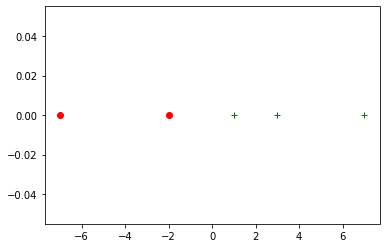

In [ ]:
def PlotLogisticData(X, Y, model):
  posX = []
  posY = []
  negX = []
  negY = []
  for x, y in zip(X,Y):
    if y:
      posX += [x]
      posY += [Predict(G(F(model,x)))]
    else:
      negX += [x]
      negY += [Predict(G(F(model,x)))]
  plt.plot(posX, posY, '+', color='green')
  plt.plot(negX, negY, 'o', color='red')
  plt.show()
PlotLogisticData(X, Y, w)

In [ ]:
print ("X=", X)
print ("Y=", Y)
w= (0,0)
w=(0,1)
w=(0,0)
Predicts = [F(w, x) for x in X]
Errors = [x*(y-G(F(w, x))) for x, y in zip(X,Y)]
print ("Predicts = ", Predicts)
print ("Errors=", Errors, sum(Errors), sum(Errors)/len(X))


X= [-7, -2, 1, 3, 7]
Y= [0.0, 0.0, 1.0, 1.0, 1.0]
Predicts =  [0, 0, 0, 0, 0]
Errors= [3.5, 1.0, 0.5, 1.5, 3.5] 10.0 2.0


In [ ]:
ws= [(0,0), (0,1), (1,0), (1,1), (1,2)]
for model in ws:
  print (model, SquaredErrorLogistic(X, Y, model), RoundIt(SquaredErrorLogistic(X, Y, model),0.1) )

(0, 0) 1.25 (1.2, 1.3)
(0, 1) 0.0887896982223366 (0.039, 0.139)
(1, 0) 1.2858817551625858 (1.236, 1.336)
(1, 1) 0.0868685548209095 (0.037, 0.137)
(1, 2) 0.004499256912790766 (-0.046, 0.054)


In [ ]:
## Average Gradients
w = ws[0]
data = [(x,y) for x, y in zip(zip(np.ones(len(X)), X), Y)]
Gradients = np.array([ ( (y-G(F(w,x[1])))*x[0], (y-G(F(w,x[1])))*x[1] ) for (x, y) in data ])
print(Gradients)

[[-0.5  3.5]
 [-0.5  1. ]
 [ 0.5  0.5]
 [ 0.5  1.5]
 [ 0.5  3.5]]


In [ ]:
GradientBatch = np.array([0.0, 0.0])
for g in Gradients:
  GradientBatch += g
GradientBatch = GradientBatch/len(Gradients)
print (GradientBatch)
print (X, Y)

[0.1 2. ]
[-7, -2, 1, 3, 7] [0.0, 0.0, 1.0, 1.0, 1.0]


In [ ]:
wNew = np.add(w, GradientBatch*learningRate)
print (wNew)
print (w)
print (SquaredErrorLogistic(X, Y, (0,0)))
print (w, SquaredErrorLogistic(X, Y, w))
for model in [np.add(w, GradientBatch*learningRate) for learningRate in (1, 1)]:
  print (model, SquaredErrorLogistic(X, Y, model))
  print (model, RoundIt(model[0],0.1), RoundIt(model[1],1.0))

[0.01 0.2 ]
(0, 0)
1.25
(0, 0) 1.25
[0.1 2. ] 0.012300762094024014
[0.1 2. ] (0.05, 0.15) (1.5, 2.5)
[0.1 2. ] 0.012300762094024014
[0.1 2. ] (0.05, 0.15) (1.5, 2.5)


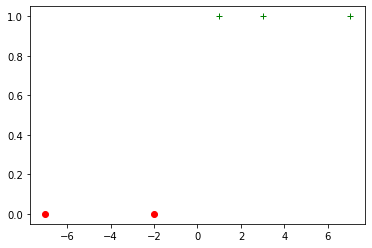

0.3010299956639812


In [ ]:
PlotLogisticData(X, Y, (0.1, 2))
print (np.log10(2))

In [ ]:
print (G(14.1))

0.9999992476022669
